In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# this notebook demo is modified from pycocotools ref:https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb
dataType='val2017'
# get your converted instance json file from tutorials/kmaxdeeplab_instance/create_instance_by_panseg.py
# put your panseg converted instance json file path
annFile='instances_val2017_converted.json'

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush banner blanket bridge cardboard counter curtain door-stuff floor-wood flower fruit gravel house light mirror-stuff net pillow platform playingfield railroad river road roof sand sea shelf snow stairs tent towel wall-brick wall-stone wall-tile wall-wood water-other window-blind window-other tree-merged fence-merged ceiling-merged sky-other-merged cabinet-merge

In [6]:
# put specific imgids you want to visualize
img_id_list=[4134]
imgIds = coco.getImgIds(imgIds = img_id_list)
print(imgIds)

[4134]


In [7]:
img = coco.loadImgs(imgIds[0])[0]

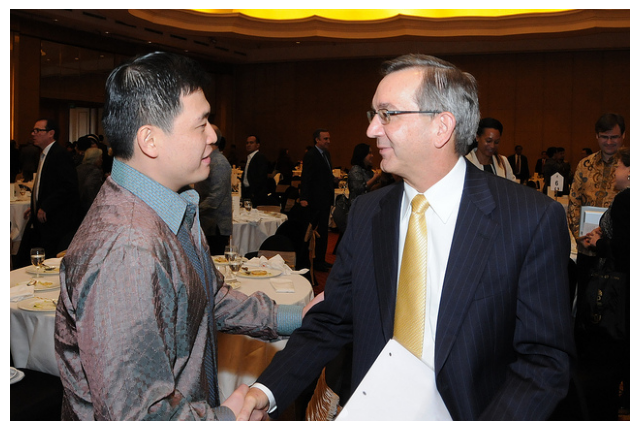

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

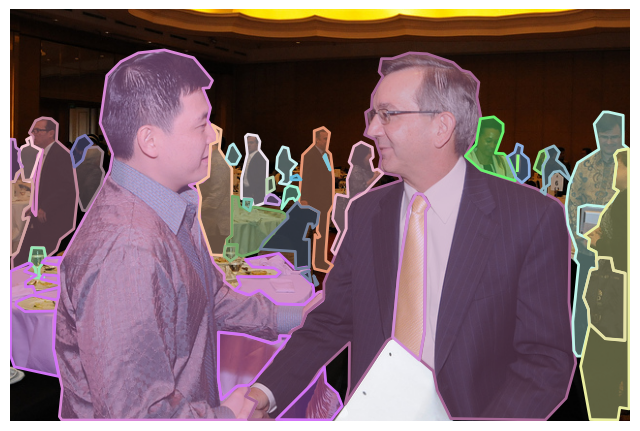

In [9]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'],  iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)